## Install necessary packages

In [1]:
!pip install roboflow             

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 12.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.10.0 requires tensorflow==2.17.0, but you have tensorflow 2.17.1 which is incompatible.


In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 25.9 MB/s eta 0:00:00


## Importing necessary packages

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import yaml
import matplotlib.patches as patches
from ultralytics import YOLO
from roboflow import Roboflow
from kaggle_secrets import UserSecretsClient

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Downloading dataset

In [4]:
# you can download the dataset from:
# https://universe.roboflow.com/sarath-mohan-cd5tg/blood-cell-classification-juuw1-siatx/dataset/1

In [5]:
secret_label = "api-key"
secret_value = UserSecretsClient().get_secret(secret_label)

In [6]:

rf = Roboflow(api_key=secret_value)
project = rf.workspace("sarath-mohan-cd5tg").project("blood-cell-classification-juuw1-siatx")
version = project.version(1)
dataset = version.download("yolov12")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Blood-Cell-Classification-1 in yolov12:: 100%|██████████| 21192/21192 [00:02<00:00, 10405.04it/s]


## Plotting demo image 

In [7]:
demo_image = cv2.imread("/kaggle/working/Blood-Cell-Classification-1/train/images/BNE_100878_jpg.rf.14267a793a6f3e0346819020add4d9f5.jpg")

In [8]:
demo_label_path = "/kaggle/working/Blood-Cell-Classification-1/train/labels/BNE_100878_jpg.rf.14267a793a6f3e0346819020add4d9f5.txt"
demo_label_file = open(demo_label_path,"r")
demo_labels = demo_label_file.read()
demo_label_file.close()

In [9]:
labels = ['eosinophil', 'lymphocyte', 'neutrophil', 'platelet']

In [10]:
demo_labels = demo_labels.split()
demo_labels = [float(x) for x in demo_labels]

In [11]:
class_label,x,y,w,h = demo_labels

In [12]:
image_x,image_y,channels = np.shape(demo_image)

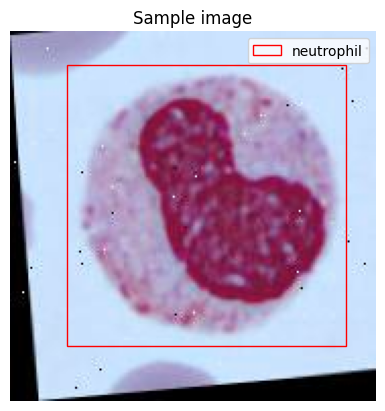

In [13]:
# Plotting a sample image
fig, ax = plt.subplots()
plt.imshow(demo_image)
plt.axis("off")
rect = patches.Rectangle(((x-w/2)*image_x, (y-h/2)*image_y), w*image_x, h*image_y, 
                         linewidth=1, edgecolor='r', facecolor='none',label = labels[int(class_label)])
ax.add_patch(rect)
plt.legend()
plt.title("Sample image")
plt.show()

## Training on YOLO v12 model

In [14]:
model = YOLO("yolo12x.pt")

100%|██████████| 114M/114M [00:01<00:00, 112MB/s]


In [15]:
# Training YOLOv12x model for 10 epochs 
results = model.train(data="/kaggle/working/Blood-Cell-Classification-1/data.yaml", epochs=10, 
                      imgsz=640, batch=0.8)

Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolo12x.pt, data=/kaggle/working/Blood-Cell-Classification-1/data.yaml, epochs=10, time=None, patience=100, batch=0.8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show

100%|██████████| 755k/755k [00:00<00:00, 25.4MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  4   9512128  ultralytics.nn.modules.block.A2C2f           [768, 768, 4, True, 4, True, 1.2]
  7                  -1  1   5309952  ultralyt

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/Blood-Cell-Classification-1/train/labels... 9267 images, 3 backgrounds, 0 corrupt: 100%|██████████| 9267/9267 [00:08<00:00, 1057.49it/s]


train: New cache created: /kaggle/working/Blood-Cell-Classification-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2808, len(boxes) = 9417. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
AutoBatch: Computing optimal batch size for imgsz=640 at 80.0% CUDA memory utilization.
AutoBatch: CUDA:0 (Tesla P100-PCIE-16GB) 15.89G total, 0.50G reserved, 0.49G allocated, 14.89G free


A new version of Albumentations is available: 2.0.5 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.


      Params      GFLOPs  GPU_mem (GB)  forward (ms) backward (ms)                   input                  output
    59123004       199.8         4.345         116.8         409.8        (1, 3, 640, 640)                    list
    59123004       399.7         6.419         102.5         323.3        (2, 3, 640, 640)                    list
    59123004       799.3        10.274         192.9         488.6        (4, 3, 640, 640)                    list
    59123004        1599        17.041         365.8         856.9        (8, 3, 640, 640)                    list
CUDA out of memory. Tried to allocate 20.00 MiB. GPU 0 has a total capacity of 15.89 GiB of which 39.12 MiB is free. Process 2702 has 15.85 GiB memory in use. Of the allocated memory 15.25 GiB is allocated by PyTorch, and 256.88 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for 

train: Scanning /kaggle/working/Blood-Cell-Classification-1/train/labels.cache... 9267 images, 3 backgrounds, 0 corrupt: 100%|██████████| 9267/9267 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2808, len(boxes) = 9417. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /kaggle/working/Blood-Cell-Classification-1/valid/labels... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<00:00, 935.37it/s]

val: New cache created: /kaggle/working/Blood-Cell-Classification-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 260, len(boxes) = 902. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 205 weight(decay=0.0), 214 weight(decay=0.0005078125), 211 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      9.38G      1.017      1.135        1.7          2        640: 100%|██████████| 1854/1854 [26:09<00:00,  1.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:42<00:00,  2.08it/s]

                   all        882        902      0.873      0.875       0.95      0.755



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      9.42G        nan        nan        nan          2        640: 100%|██████████| 1854/1854 [25:36<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.17it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      9.42G     0.8445     0.6201      1.488          2        640: 100%|██████████| 1854/1854 [25:29<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.17it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      9.42G        nan        nan        nan          2        640: 100%|██████████| 1854/1854 [25:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      9.42G     0.7402     0.5126       1.39          2        640: 100%|██████████| 1854/1854 [25:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      9.42G     0.6952     0.4685      1.345          2        640: 100%|██████████| 1854/1854 [25:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      9.42G     0.6748     0.4395      1.319          2        640: 100%|██████████| 1854/1854 [25:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      9.42G     0.6422     0.4089      1.294          2        640: 100%|██████████| 1854/1854 [25:28<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      9.42G      0.618     0.3932      1.264          2        640: 100%|██████████| 1854/1854 [25:27<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      9.42G     0.5946     0.3684      1.241          2        640: 100%|██████████| 1854/1854 [25:28<00:00,  1.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.16it/s]

                   all        882        902          0          0          0          0



10 epochs completed in 4.381 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 119.1MB
Optimizer stripped from runs/detect/train/weights/best.pt, 119.1MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12x summary (fused): 283 layers, 59,047,964 parameters, 0 gradients, 198.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 89/89 [00:41<00:00,  2.14it/s]


                   all        882        902      0.873      0.875       0.95      0.755
            eosinophil        280        281      0.995      0.749      0.979      0.826
            lymphocyte        243        244      0.853      0.975      0.986      0.806
            neutrophil        201        201      0.797       0.95      0.959      0.767
              platelet        159        176      0.848      0.824      0.877       0.62


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 43.8ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train


In [16]:
metrics = model.val()

Ultralytics 8.3.105 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
YOLOv12x summary (fused): 283 layers, 59,047,964 parameters, 0 gradients, 198.5 GFLOPs


val: Scanning /kaggle/working/Blood-Cell-Classification-1/valid/labels.cache... 882 images, 0 backgrounds, 0 corrupt: 100%|██████████| 882/882 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 260, len(boxes) = 902. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 177/177 [00:44<00:00,  4.00it/s]


                   all        882        902      0.873      0.875       0.95      0.755
            eosinophil        280        281      0.995       0.75      0.979      0.826
            lymphocyte        243        244      0.853      0.975      0.986      0.806
            neutrophil        201        201      0.796       0.95      0.959      0.769
              platelet        159        176      0.848      0.825      0.878       0.62


invalid value encountered in less
invalid value encountered in less


Speed: 0.2ms preprocess, 46.5ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/train2


In [17]:
print(metrics.box.map)  # mAP50-95
print(metrics.box.map50)  # mAP50
print(metrics.box.map75)  # mAP75
print(metrics.box.maps)  # list of mAP50-95 for each category

0.7551514135532005
0.9504707145888704
0.910138623920323
[    0.82602     0.80597     0.76863     0.61998]
